## Credit Card Default Prediction using kNN and Logistic Regression

In [1]:
#Libraries for Processing
import pandas as pd
import numpy as np
import datetime
from sklearn.preprocessing import MinMaxScaler

#Libraries for Visualisations
from pylab import plot, show
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

#Libraries for Machine learning
#from sklearn.model_selection import StratifiedKFold
#from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 

#Libraries for Evaluation
from sklearn.metrics import roc_curve, auc
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
creditcard = pd.read_csv('Dataset/creditcard_defaulters.csv')

In [3]:
creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [4]:
creditcard.shape

(30000, 24)

In [5]:
creditcard.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


In [6]:
creditcard=creditcard.rename(columns={'default payment next month':'default'})

In [7]:
creditcard['default'].value_counts()

0    23364
1     6636
Name: default, dtype: int64

### Data Balancing

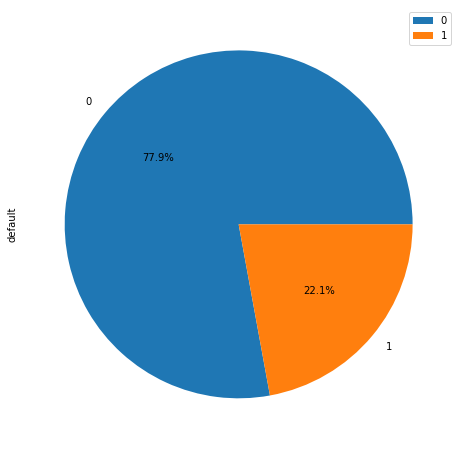

In [8]:
#Pie chart showing the distribution of payment default in the dataset
creditcard['default'].value_counts().plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend(bbox_to_anchor=(1, 1))

In [9]:
#Collect Random Samples from both classes to balance the dataset
rs = 123 #Random state 'rs' ensures reproducability of results everytime the code in run
yes = creditcard.query('default == 0').sample(n = 6700, random_state = rs)
no = creditcard.query('default == 1').sample(n = 6636, random_state = rs)

frame = [yes, no]

final_creditcard = pd.concat(frame)

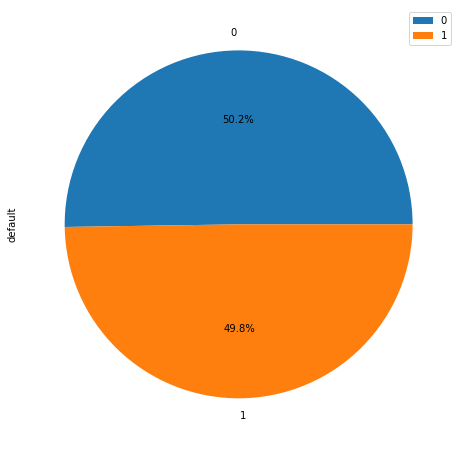

In [10]:
#Pie chart showing the distribution of payment default in the dataset
final_creditcard['default'].value_counts().plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend(bbox_to_anchor=(1, 1))

### Check for null values

In [11]:
final_creditcard.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [12]:
X = final_creditcard.iloc[:,0:22]

y = final_creditcard.iloc[:,-1]

### Data Normalisation

In [13]:
standardScaler = MinMaxScaler()
X= standardScaler.fit_transform(X)

### Train Test Split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

### Logistic Regression

In [15]:
LogReg = LogisticRegression(solver='liblinear')
LogReg = LogReg.fit(X_train, y_train)
LogReg

LogisticRegression(solver='liblinear')

In [16]:
y_predLR = LogReg.predict(X_test)
LRacc=LogReg.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(LRacc))

Accuracy score= 0.6768


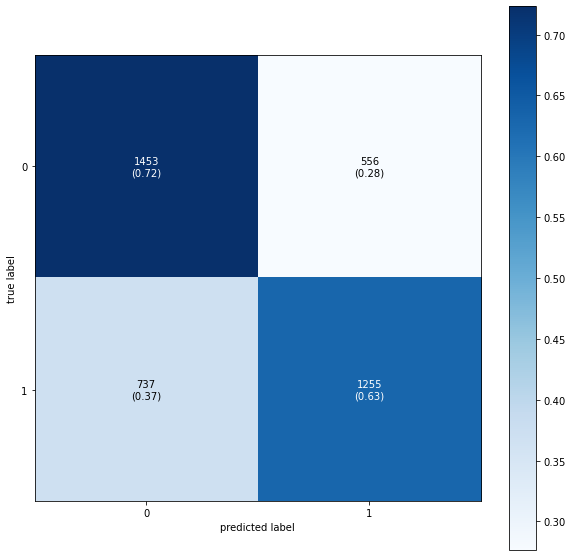

In [17]:
CM=confusion_matrix(y_test, y_predLR)

fig, ax = plot_confusion_matrix(conf_mat=CM,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [18]:
CR=classification_report(y_test, y_predLR, digits=4)
print(CR)

              precision    recall  f1-score   support

           0     0.6635    0.7232    0.6921      2009
           1     0.6930    0.6300    0.6600      1992

    accuracy                         0.6768      4001
   macro avg     0.6782    0.6766    0.6760      4001
weighted avg     0.6782    0.6768    0.6761      4001



In [19]:
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_predLR)
roc_auc = metrics.auc(fpr, tpr)

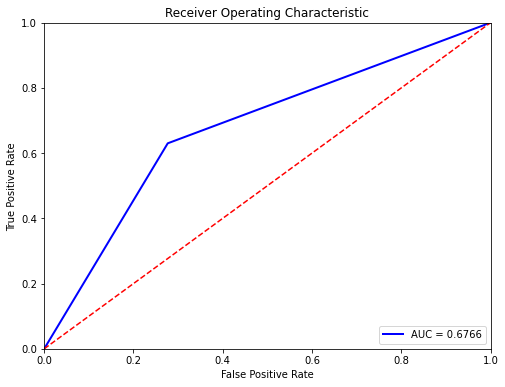

In [20]:
# Plotting ROC Curve
plt.figure(figsize=[8,6])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', linewidth= 2, label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### k Nearest Neighbour

In [21]:
k_values = range(1,31)
for k in k_values:
    print('For k = ', k)

    knn = KNeighborsClassifier(n_neighbors = k) 

    knn.fit(X_train, y_train) 

    y_predK = knn.predict(X_test)
    Kacc=knn.score(X_test, y_test)

    print('Accuracy score= {:.4f}'.format(Kacc))
    print('\n')

For k =  1
Accuracy score= 0.6128


For k =  2
Accuracy score= 0.6198


For k =  3
Accuracy score= 0.6413


For k =  4
Accuracy score= 0.6526


For k =  5
Accuracy score= 0.6548


For k =  6
Accuracy score= 0.6633


For k =  7
Accuracy score= 0.6683


For k =  8
Accuracy score= 0.6738


For k =  9
Accuracy score= 0.6753


For k =  10
Accuracy score= 0.6773


For k =  11
Accuracy score= 0.6741


For k =  12
Accuracy score= 0.6776


For k =  13
Accuracy score= 0.6766


For k =  14
Accuracy score= 0.6796


For k =  15
Accuracy score= 0.6823


For k =  16
Accuracy score= 0.6831


For k =  17
Accuracy score= 0.6846


For k =  18
Accuracy score= 0.6863


For k =  19
Accuracy score= 0.6873


For k =  20
Accuracy score= 0.6876


For k =  21
Accuracy score= 0.6931


For k =  22
Accuracy score= 0.6911


For k =  23
Accuracy score= 0.6941


For k =  24
Accuracy score= 0.6926


For k =  25
Accuracy score= 0.6926


For k =  26
Accuracy score= 0.6916


For k =  27
Accuracy score= 0.6898


For k =  2

In [22]:
knn = KNeighborsClassifier(n_neighbors = 23) 

knn.fit(X_train, y_train) 

y_predK = knn.predict(X_test)
Kacc=knn.score(X_test, y_test)

print('Accuracy score= {:.4f}'.format(Kacc))

Accuracy score= 0.6941


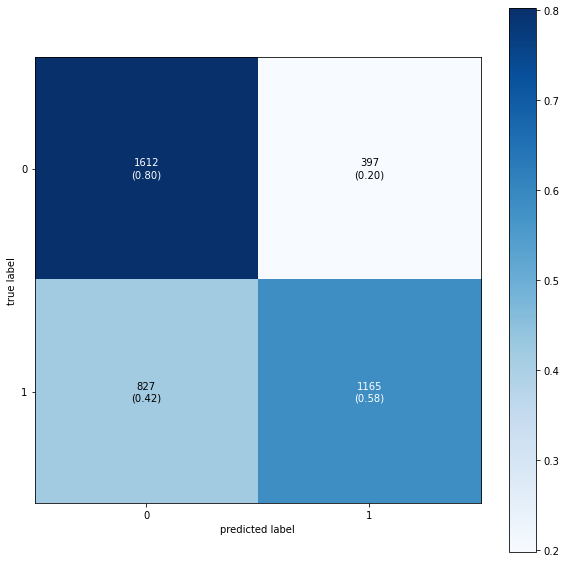

In [23]:
CM=confusion_matrix(y_test, y_predK)

fig, ax = plot_confusion_matrix(conf_mat=CM,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [24]:
CR=classification_report(y_test, y_predK, digits=4)
print(CR)

              precision    recall  f1-score   support

           0     0.6609    0.8024    0.7248      2009
           1     0.7458    0.5848    0.6556      1992

    accuracy                         0.6941      4001
   macro avg     0.7034    0.6936    0.6902      4001
weighted avg     0.7032    0.6941    0.6904      4001



In [25]:
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_predK)
roc_auc = metrics.auc(fpr, tpr)

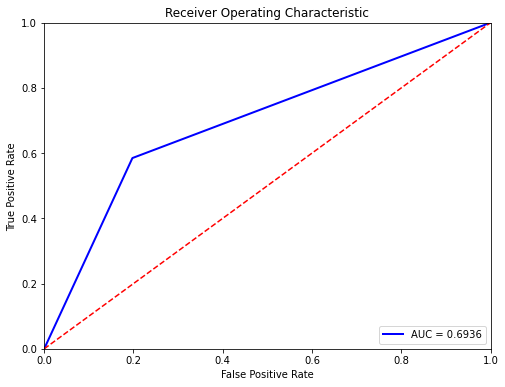

In [26]:
# Plotting ROC Curve
plt.figure(figsize=[8,6])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', linewidth= 2, label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [27]:
acc = [Kacc, LRacc]
langs = ['kNN', 'Log Reg']

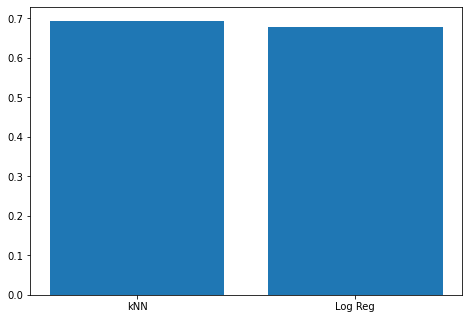

In [28]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.bar(langs,acc)

plt.show()